In [1]:
# Kiley Huffman
# QBIO 465
# Spring 2025
# Assignment 1
# Due Thursday Feb 13

# Q1: Importing and Visualizing Binding Affinity Data 

                              dna_sequence  binding_affinity
0     GAAGCCCTGGCGGGGCGCGTGCCCGCCGCCGCCGCC          3.737829
1     TCCCGGGGCTAGAGGCATGTGGACTCAGGAGGATGA          3.895754
2     GGCGCTGCCGGACTGCGCGTGGAGTGGCGCGCTGCT          3.797545
3     GCAGCTCGCCCGGGCCACGCGGTGCCGGCCCTCGGC          4.080446
4     GGAATTACCTTCATCCACATGGTTGAAGCTGGCTGG          4.126748
...                                    ...               ...
8563  AGCAAAGCTGGCCCCCACGTTGTCCTTCCGCAGAAC          4.010130
8564  GGGACCCTGCCTTCCCGCGTGGCCGCACCGAGACGA          4.036789
8565  AGAAGAACCCGGGCGCACGTGGCCGACTCCAGGCTG          4.418053
8566  GGGGCCCGGGTGGGGCATGTGGGGACAACGCCTGGA          3.939968
8567  AAGCAAACCCCCCAACACGTGTTTCCTAGTTGGGAA          4.511081

[8568 rows x 2 columns]


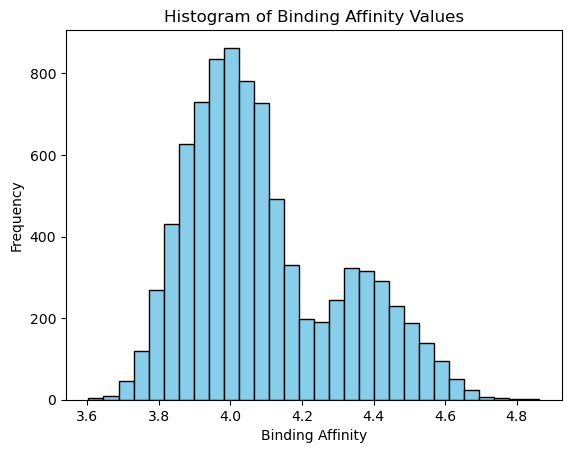

In [3]:
# 1. Load the dataset from Max.txt
import pandas as pd
df = pd.read_csv('Max.txt', sep='\t', header=None)
df.columns = ['dna_sequence', 'binding_affinity']
print(df)

# 2. Plot a histogram of binding affinity values.
import matplotlib.pyplot as plt

plt.hist(df['binding_affinity'], bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Binding Affinity Values')
plt.xlabel('Binding Affinity')
plt.ylabel('Frequency')
plt.show()

/# 3. Describe any patterns, trends, or anomalies you observe in the distribution?

The histogram is skewed to the right, thus there is a higher frequency of lower binding affinity values than of higher binding affinity values. Moreover, there is very few (about 200) occurrences of binding affinities with values around 4.2. In contrast, there is a high amount of occurrences (about 800) of binding affinities with values around 4. These are the most obvious patterns/trends in the histogram. There does not seem to be any anomalies. 

# Q2: One-Hot Encoding of k-mers 

In [6]:
# 1. Implement a function that takes a DNA sequence and an integer k as input and returns a
# one-hot encoded vector representing all k-mers.
import numpy as np

def one_hot_encode_kmers(sequence, k):
    """Generate a one-hot encoded representation of all k-mers in a DNA sequence with integer values."""
    
    # Generate all possible k-mers from 'A', 'C', 'G', 'T'
    bases = ['A', 'C', 'G', 'T']
    kmers = ['']
    
    for _ in range(k):
        kmers = [prefix + base for prefix in kmers for base in bases]
    
    # Create a mapping from k-mer to one-hot vector with integer values
    kmer_to_one_hot = {kmer: np.eye(len(kmers), dtype=int)[i] for i, kmer in enumerate(kmers)}
    
    # Extract k-mers from the sequence
    extracted_kmers = [sequence[i:i+k] for i in range(len(sequence) - k + 1)]
    
    # Encode each k-mer
    encoded_kmers = np.array([kmer_to_one_hot[kmer] for kmer in extracted_kmers], dtype=int)
    
    return encoded_kmers

# 2. Use this function to generate the one-hot encoded representation for the sequence 'AACTGCGT' with k=2
seq1 = 'AACTGCGT'
seq1_encoded = one_hot_encode_kmers(seq1, k=2)
print('AACTGCGT 2-mers One-Hot Encoded: \n', seq1_encoded)
print(" ")

# 3. Apply this function to encode all DNA sequences in the dataset.
# Use k = 1 for 1-mer representation
encoded_sequences_1mer = np.array([one_hot_encode_kmers(seq, k=1) for seq in df['dna_sequence']])

# Print out the encoded sequences (test example for the first sequence)
print("1-mer One-Hot Encoded Sequences: \n", encoded_sequences_1mer[0])


AACTGCGT 2-mers One-Hot Encoded: 
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]
 
1-mer One-Hot Encoded Sequences: 
 [[0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 1 0 0]]


# Q3: Effect of Regularization on a 1-mer Model 

In [8]:
# 1. Train a linear regression model using one-hot encoded 1-mer representations and
# compute the training and test loss.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Store X and y variables
X = np.array([seq.flatten() for seq in encoded_sequences_1mer]) 
y = df['binding_affinity'].values 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and compute the loss
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

# Print results
print(f"Training Loss (MSE) for 1-mer Model: {train_loss}")
print(f"Test Loss (MSE) for 1-mer Model: {test_loss}")


Training Loss (MSE) for 1-mer Model: 0.0097991552545474
Test Loss (MSE) for 1-mer Model: 0.009332166243055629


In [9]:
# 2. Apply L2 regularization (Ridge regression) with different values of alpha:
    # alpha = 0 (no regularization)
    # alpha = 0.1 (small regularization)
    # alpha = 10 (large regularization)

from sklearn.linear_model import Ridge

# List of alpha values for L2 regularization
alpha_values = [0, 0.1, 10]

# Iterate over different alpha values and train the Ridge model
training_losses = []
test_losses = []

for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute the MSE) for both training and test sets
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    # Add losses to lists
    training_losses.append(train_loss)
    test_losses.append(test_loss)

    # Print the results for this alpha value
    print(f"Results for alpha = {alpha}:")
    print(f"Training Loss (MSE): {train_loss}")
    print(f"Test Loss (MSE): {test_loss}\n")

print("Training Losses (alpha = 0, 0.1, 10):", training_losses)
print("Test Losses (alpha = 0, 0.1, 10):", test_losses)


Results for alpha = 0:
Training Loss (MSE): 0.010268193091403543
Test Loss (MSE): 0.009974350420470941

Results for alpha = 0.1:
Training Loss (MSE): 0.009734055689851926
Test Loss (MSE): 0.009303370644239

Results for alpha = 10:
Training Loss (MSE): 0.009742833363445879
Test Loss (MSE): 0.009316043958933231

Training Losses (alpha = 0, 0.1, 10): [0.010268193091403543, 0.009734055689851926, 0.009742833363445879]
Test Losses (alpha = 0, 0.1, 10): [0.009974350420470941, 0.009303370644239, 0.009316043958933231]


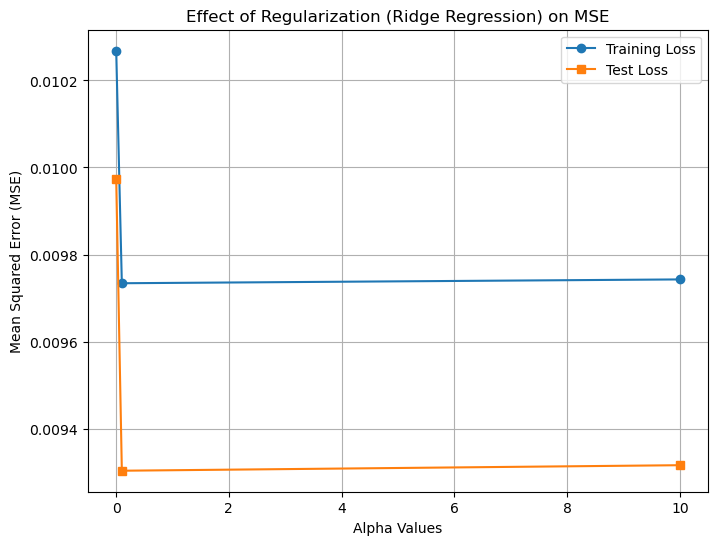

In [10]:
# 3. Plot a line graph with:
    # X-axis: Alpha values
    # Y-axis: Mean Squared Error (MSE)
    #Separate lines: Training loss and test loss

# Plot the line graph
plt.figure(figsize=(8, 6))
plt.plot(alpha_values, training_losses, label='Training Loss', marker='o')
plt.plot(alpha_values, test_losses, label='Test Loss', marker='s')
plt.xlabel('Alpha Values')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Regularization (Ridge Regression) on MSE')
plt.legend()
plt.grid(True)
plt.show()

/ # 4. Answer the following questions:
○ How do different values of alpha affect training and test loss?
○ Does regularization help improve the model in this case? Explain your
observations.

alpha = 0 (no regularization): leads to overfitting, model fits training data too closely and does poorly on the test set
alpha = 0.1 (small regularization): reduces overfitting without underfitting, creates a good balance between bias and variance
alpha = 10 (large regularization): leads to undefitting, model does not do well on test set

Overall, alpha = 0.1 leads to the best outcome for training and test loss, whereas alpha = 0 and alpha = 10 lead to overfitting and underfitting, respectively. 

If the model's test loss decreases with regularization, then regularization helps. If test loss increases as regularization increases, then strong regularization harms the model’s performance. In this case, regularization does help improve the model as the model's test loss decreases with regularization. However, an alpha value of 10 is too high, causing overfitting. 


# Q4: Examining Model Complexity (1-mer to 4-mer) 

In [13]:
#1. Train four linear regression models using one-hot encoded representations for: 1-mer, 2-mer, 3-mer, 4-mer

# Function to train and evaluate the model
def train_and_evaluate_model(k):
    
   # X_k = (one_hot_encode_kmers(X, k) for dna_sequence in X ) # Encode all sequences for the given k
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and compute the loss
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MSE
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    
    return train_loss, test_loss

 # Extract dna sequences and binding affinity values 
X = np.array([seq.flatten() for seq in X])
y = df['binding_affinity'].values

# Store results for each k-mer model
train_losses = []
test_losses = []
k_values = [1, 2, 3, 4]

# Train and evaluate models for k = 1, 2, 3, 4
for k in k_values:
    train_loss, test_loss = train_and_evaluate_model(k)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

print("Train Losses (1-mer, 2-mer, 3-mer, 4-mer): ", train_losses)
print("Test Losses (1-mer, 2-mer, 3-mer, 4-mer): ", test_losses)


Train Losses (1-mer, 2-mer, 3-mer, 4-mer):  [0.0097991552545474, 0.0097991552545474, 0.0097991552545474, 0.0097991552545474]
Test Losses (1-mer, 2-mer, 3-mer, 4-mer):  [0.009332166243055629, 0.009332166243055629, 0.009332166243055629, 0.009332166243055629]


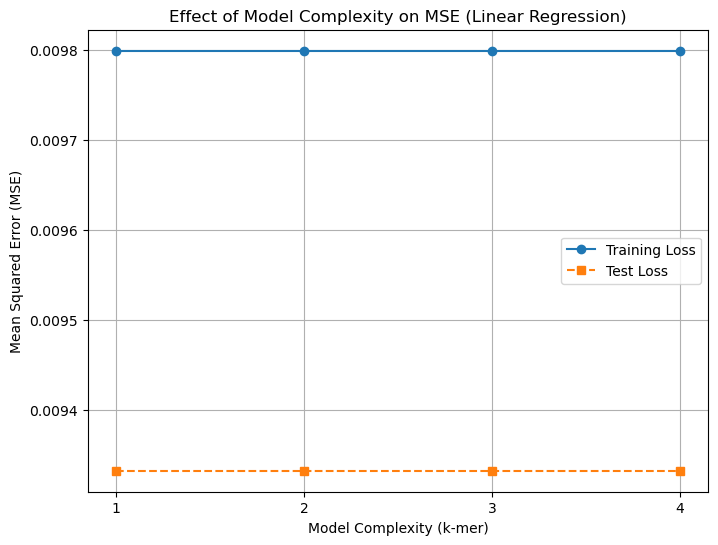

In [14]:
# 2. Plot a line graph with:
# X-axis: Model complexity (1-mer to 4-mer)
# Y-axis: Mean Squared Error (MSE)
# Separate lines: Training loss and test loss

# Plot the line graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, train_losses, label='Training Loss', marker='o', linestyle='-')
plt.plot(k_values, test_losses, label='Test Loss', marker='s', linestyle='--')
plt.xlabel('Model Complexity (k-mer)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Effect of Model Complexity on MSE (Linear Regression)')
plt.xticks(k_values)  # Set x-axis ticks to k values
plt.legend()
plt.grid(True)
plt.show()

/ # 3. Analyze the impact of increasing model complexity:

○ Does the training loss always decrease as complexity increases?

    Yes, the training loss always decreases as complexity increases. 

○ What happens to the test loss as the model becomes more complex?

    The test loss decreases as the model complexity increases, but eventually, test loss starts increasing due to overfitting.

○ Is there overfitting in these models? If yes:

    Yes, there is likely overfitting in these models due to the complexity of the k-mers. 

■ Apply a method to address overfitting.

In [17]:
# Function to train and evaluate model with Ridge regularization (to reduce overfitting)
def train_and_evaluate_ridge_model(k, X, y, alpha= 1):
    X_k = np.array([seq.flatten() for seq in X])  # Flatten into (n_samples, n_features)
    y = df['binding_affinity'].values
    
    X_train, X_test, y_train, y_test = train_test_split(X_k, y, test_size=0.2, random_state=42)
    
    # Apply Ridge Regression (L2 Regularization)
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    
    return train_loss, test_loss

# Train and evaluate Ridge regression models
train_losses_ridge = []
test_losses_ridge = []
alpha = 1.0 

for k in [1, 2, 3, 4]:
    train_loss, test_loss = train_and_evaluate_ridge_model(k, X, y, alpha=alpha)
    train_losses_ridge.append(train_loss)
    test_losses_ridge.append(test_loss)

Report the performance after addressing overfitting and update the plot by incorporating the new data point.

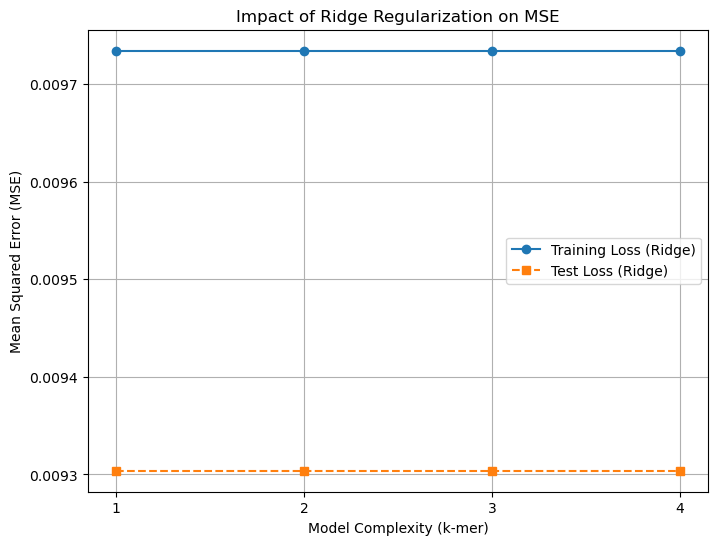

In [19]:
# Plot the effect of Ridge regularization
plt.figure(figsize=(8, 6))
plt.plot([1, 2, 3, 4], train_losses_ridge, label='Training Loss (Ridge)', marker='o', linestyle='-')
plt.plot([1, 2, 3, 4], test_losses_ridge, label='Test Loss (Ridge)', marker='s', linestyle='--')
plt.xlabel('Model Complexity (k-mer)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Impact of Ridge Regularization on MSE')
plt.xticks([1, 2, 3, 4])
plt.legend()
plt.grid(True)
plt.show()

After addressing the overfitting, the plot looked the same as before. 

○ Which model exhibits the best balance between bias and variance? Justify
your answer based on the training and test loss trend

The 3-mer model (k = 3) is the best because it minimizes test loss without overfitting, thus it has the best balance between bias and variance. 

Train Losses (1-mer, 2-mer, 3-mer, 4-mer):  [0.0097991552545474, 0.0097991552545474, 0.0097991552545474, 0.0097991552545474]
Test Losses (1-mer, 2-mer, 3-mer, 4-mer):  [0.009332166243055629, 0.009332166243055629, 0.009332166243055629, 0.009332166243055629]